In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("./data/train_NIR5Yl1.csv")
sub_df = pd.read_csv("./data/test_8i3B3FC.csv")

** Train data **
- online ques/ans platform

problem statement : identify the best question authors 

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


- We Got no missing data

Columns:
1. ID : Question if
2. Tag : Tag representing question category
3. Reputation : Reputation score of question author
4. Answers : Num of times question hase been answered
5. USername : user id of quest author
6. Views : Num of times quest has been viewed
7. Upvotes : Num of upvotes for the question

Evalutaion metric : RMSE


In [6]:
train_df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [16]:
train_df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


** Column : Tag **

In [11]:
tags = np.unique(train_df.Tag.values)
print(tags)
print(len(tags))

['a' 'c' 'h' 'i' 'j' 'o' 'p' 'r' 's' 'x']
10


In [12]:
# there are 10 tags, it does nt need much processing

** Column : Reputation **


In [35]:
print("mean of repuation is : ",train_df.Reputation.mean())
print("median of repuation is : ",train_df.Reputation.median())
print("-"*40)
print("Max : ",train_df.Reputation.max())
print("Min : ",train_df.Reputation.min())
print("-"*40)
print("25 percentile : ",train_df.Reputation.quantile(.25))
print("50 percentile : ",train_df.Reputation.quantile(.50))
print("80 percentile : ",train_df.Reputation.quantile(.80))
print("95 percentile : ",train_df.Reputation.quantile(.95))

mean of repuation is :  7773.146798163887
median of repuation is :  1236.0
----------------------------------------
Max :  1042428.0
Min :  0.0
----------------------------------------
25 percentile :  282.0
50 percentile :  1236.0
80 percentile :  7064.0
95 percentile :  32209.0


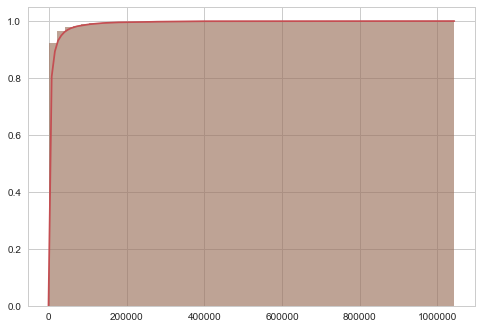

In [94]:
# CDF 
sns.set_style("whitegrid")
sns.distplot(train_df.Reputation.values,hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.show()

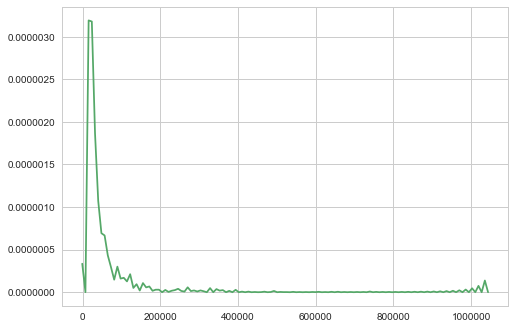

In [108]:
# PDF
sns.set_style("whitegrid")
sns.kdeplot(train_df.Reputation.values)
plt.show()

- We can see it is highly skewed.( +vely skewed, mean greater to median ) 
- most of the points are having values lesss than 50000

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


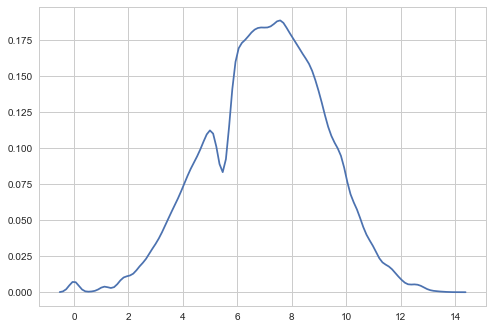

In [111]:
# taking log
sns.set_style("whitegrid")

sns.kdeplot(np.log(train_df.Reputation.values))
plt.show()

- we will store this result in train_df

In [112]:
train_df['log_Reputaion'] = np.log(train_df.Reputation)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [115]:
train_df.log_Reputaion.max()
# we can see that max value is now 13

13.857063165521813

** Column : Answers **

In [117]:
print("mean : ",train_df.Answers.mean())
print("median  : ",train_df.Answers.median())
print("-"*40)
print("Max : ",train_df.Answers.max())
print("Min : ",train_df.Answers.min())
print("-"*40)
print("25 percentile : ",train_df.Answers.quantile(.25))
print("50 percentile : ",train_df.Answers.quantile(.50))
print("80 percentile : ",train_df.Answers.quantile(.80))
print("95 percentile : ",train_df.Answers.quantile(.95))

mean :  3.917671832628884
median  :  3.0
----------------------------------------
Max :  76.0
Min :  0.0
----------------------------------------
25 percentile :  2.0
50 percentile :  3.0
80 percentile :  6.0
95 percentile :  10.0


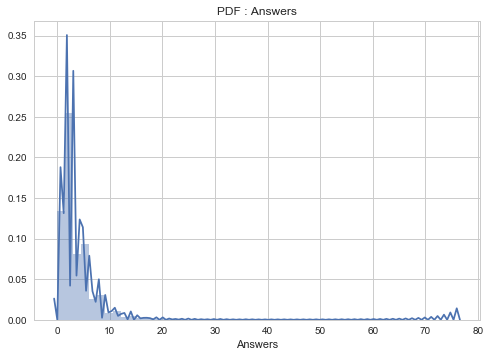

In [120]:
sns.distplot(train_df.Answers)
plt.title("PDF : Answers")
plt.show()

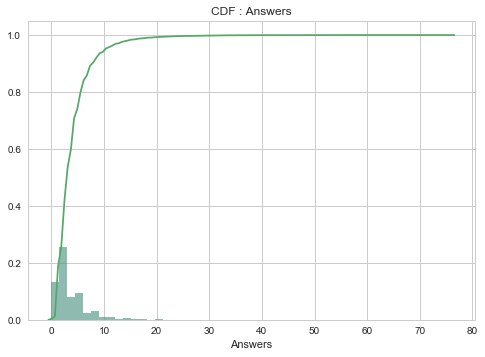

In [122]:
sns.distplot(train_df.Answers,kde_kws=dict(cumulative=True))
plt.title("CDF : Answers")
plt.show()

** Column : Username **

In [132]:
print("Max : ",train_df.Username.max())
print("Min : ",train_df.Username.min())

print(len(np.unique(train_df.Username.values)))

Max :  175738
Min :  0
141802


In [133]:
# max username is 175738
# total users are 141802

** Column : Views **

In [134]:
print("mean : ",train_df.Views.mean())
print("median  : ",train_df.Views.median())
print("-"*40)
print("Max : ",train_df.Views.max())
print("Min : ",train_df.Views.min())
print("-"*40)
print("25 percentile : ",train_df.Views.quantile(.25))
print("50 percentile : ",train_df.Views.quantile(.50))
print("80 percentile : ",train_df.Views.quantile(.80))
print("95 percentile : ",train_df.Views.quantile(.95))

mean :  29645.071341786726
median  :  8954.0
----------------------------------------
Max :  5231058.0
Min :  9.0
----------------------------------------
25 percentile :  2594.0
50 percentile :  8954.0
80 percentile :  34921.20000000001
95 percentile :  116699.79999999993


- this looks like left skewed.
- We will check with the pdf and cdf


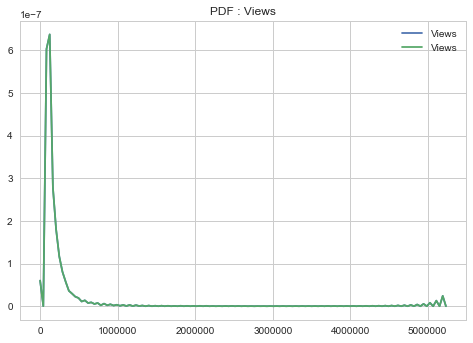

In [141]:
sns.set_style("whitegrid")
sns.kdeplot(train_df.Views)
plt.title("PDF : Views")
plt.show()

In [142]:
# Views are also shwoing power law dist

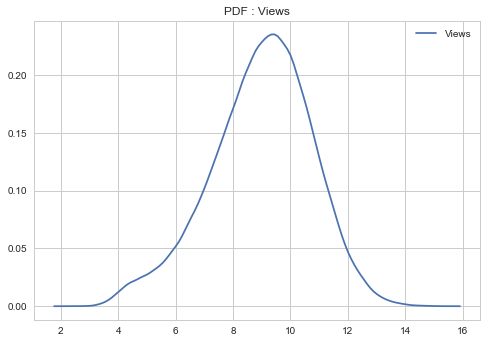

In [143]:
sns.set_style("whitegrid")
sns.kdeplot(np.log(train_df.Views))
plt.title("PDF : Views")
plt.show()

In [144]:
# We got gaussian from power law after applying log

In [145]:
train_df['log_Views'] = np.log(train_df.Views)

** Column : Upvotes **

In [151]:
print("mean : ",train_df.Upvotes.mean())
print("median  : ",train_df.Upvotes.median())
print("-"*40)
print("Max : ",train_df.Upvotes.max())
print("Min : ",train_df.Upvotes.min())
print("-"*40)
print("25 percentile : ",train_df.Upvotes.quantile(.25))
print("50 percentile : ",train_df.Upvotes.quantile(.50))
print("80 percentile : ",train_df.Upvotes.quantile(.80))
print("95 percentile : ",train_df.Upvotes.quantile(.95))

mean :  337.5053583602236
median  :  28.0
----------------------------------------
Max :  615278.0
Min :  0.0
----------------------------------------
25 percentile :  8.0
50 percentile :  28.0
80 percentile :  153.0
95 percentile :  959.0


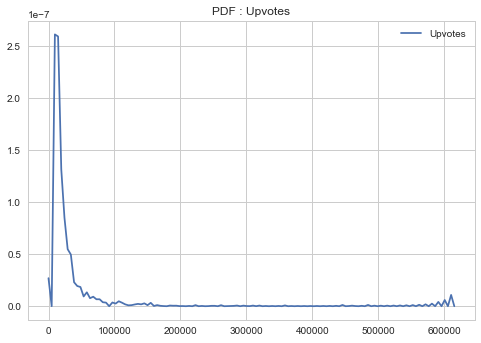

In [153]:
sns.set_style("whitegrid")
sns.kdeplot(train_df.Upvotes)
plt.title("PDF : Upvotes")
plt.show()

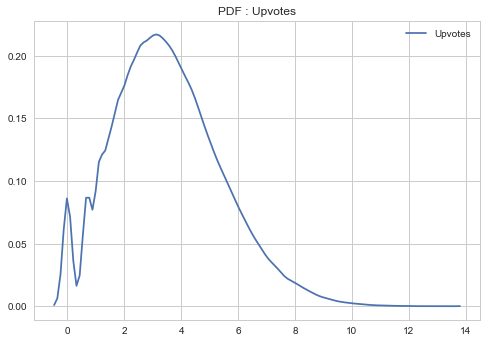

In [154]:
sns.set_style("whitegrid")
sns.kdeplot(np.log(train_df.Upvotes))
plt.title("PDF : Upvotes")
plt.show()

In [155]:
train_df['log_Upvotes'] = np.log(train_df.Upvotes)

In [156]:
train_df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,log_Reputaion,log_Answers,log_Views,log_Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0,8.279443,0.693147,8.968906,3.737670
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,10.167619,2.484907,10.929547,7.069023
2,468453,c,1358.0,4.0,56177,8067.0,60.0,7.213768,1.386294,8.995537,4.094345
3,96996,a,264.0,3.0,168793,27064.0,9.0,5.575949,1.098612,10.205960,2.197225
4,131465,c,4271.0,4.0,112223,13986.0,83.0,8.359603,1.386294,9.545812,4.418841


In [270]:
final_df = train_df[['Tag','Reputation','Answers','Views','Upvotes']]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
final_df.Tag = LabelEncoder().fit_transform(final_df.Tag.values)

In [271]:
onehot = OneHotEncoder(categorical_features=[0])
final_df = onehot.fit_transform(final_df).toarray()

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = final_df[:,1:13]
y = final_df[:,13]
X = StandardScaler().fit_transform(X)
X_train, X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2)


In [281]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(264036, 12)
(66009, 12)
(264036,)
(66009,)


## ML Models

In [283]:
# Baseline log reg model
def get_rmse(y_true,y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log_reg_cv = LogisticRegressionCV(Cs=[0.1],cv=3,n_jobs=-1)
log_reg_cv.fit(X_train,y_train)
from sklearn.metrics import f1_score
y_pred = log_reg_cv.predict(X_test)
print("RMSE : ",get_rmse(y_test,y_pred))
print("f1 score : ", f1_score(y_true,y_pred))